# Homework 7 solutions

## Cross-correlation function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [2]:
def corr_sum(f, g):
    # note we're assuming f and g have the same length
    n = len(f)
    corr = np.zeros(2*n-1)
    for j in range(-(n-1),n):
        for i in range(n):
            if (i+j)>=0 and (i+j)<n:
                corr[j] += f[i] * g[i+j]
    # shift so that zero offset is in the center
    return np.roll(corr, n-1)    

def corr_fft(f, g, pad = True):
    if pad:
        n = len(f) + len(g) - 1
    else:
        n = len(f)
    ff = np.fft.fft(f, n)
    gg = np.fft.fft(g, n)
    corr = np.fft.ifft(np.conj(ff) * gg)
    return np.fft.fftshift(corr)

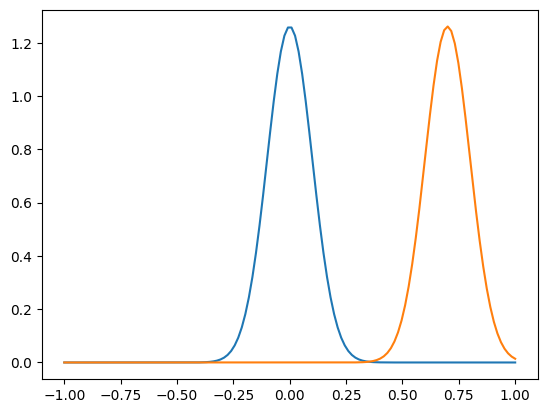

/opt/homebrew/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


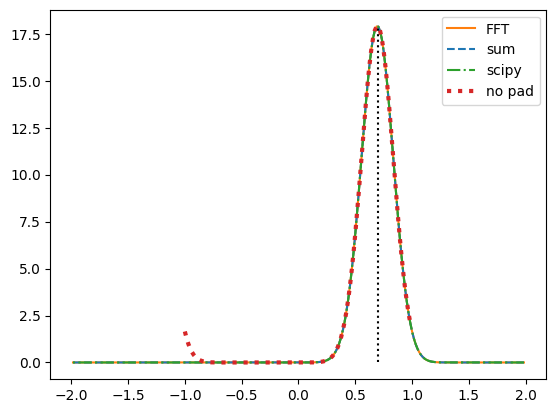

In [3]:
def gaussian(x, x0, s):
    return np.exp(-0.5*(x-x0)**2/s**2) / np.sqrt(2*np.pi*s)

n = 128
xshift = 0.7
x = np.linspace(-1,1,n, endpoint=True)
f = gaussian(x, 0, 0.1)
g = gaussian(x, xshift, 0.1)

plt.plot(x,f)
plt.plot(x,g)
plt.show()

corr1 = corr_sum(f,g)
corr2 = corr_fft(f,g)
y = 2*np.arange(-(n-1),n)/n
plt.plot(y, corr2, "C1", label='FFT')
plt.plot(y, corr1, "C0--", label='sum')

corr4 = scipy.signal.correlate(f,g)                               
y4 = -2*scipy.signal.correlation_lags(n,n)/n
plt.plot(y4, corr4, "C2-.", label='scipy')

corr3 = corr_fft(f,g, pad = False)
y3 = 2*np.arange(-(n-1)//2,n//2)/n
plt.plot(y3, corr3, "C3:", lw = 3, label='no pad')

plt.plot((xshift, xshift), (0,max(corr1)), "k:")
plt.legend()

plt.show()

We can see that for large shifts, the correlation function wraps around without zero-padding.

## Chebyshev polynomials

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

First remind ourselves what the Chebyshev polynomials look like. Notice that they are always in the range -1 to 1 and that the value at boundaries is either -1 or 1 (left) or 0 (right).

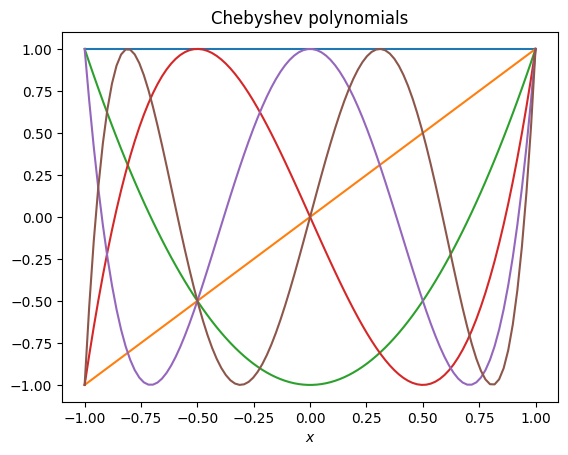

In [5]:
# Plot the Chebyshev polynomials
# from https://andrewcumming.github.io/phys512/polynomial_fit.html#orthogonal-polynomials

def plot_poly(poly_generator, title, num):
    for i in range(num):
        x = np.linspace(-1,1,100)
        a = np.zeros(num)
        a[i] = 1
        poly = poly_generator(a)
        plt.plot(x, poly(x))
    plt.xlabel(r'$x$')
    plt.title(title)
    plt.show()

plot_poly(np.polynomial.chebyshev.Chebyshev, 'Chebyshev polynomials', 6)

The method of images gives us the Green's function for zero boundary conditions:

In [6]:
def gaussian(x, x0, t, D):
    # Green's function for the diffusion equation
    return np.exp(-(x-x0)**2/(4*D*t)) / np.sqrt(4*np.pi*D*t)

def greens(x, x0, t, D):
    # Green's function for the diffusion equation with zero boundary conditions at x=-1,+1
    T = gaussian(x, x0, t, D)
    T -= gaussian(x, -1-(1+x0), t, D)
    T -= gaussian(x, 1+(1-x0), t, D)
    return T

First let's try the Chebyshev decomposition and differentiation and make sure we get a sensible result when we transform back to real space:

[ 3.21634303e-01  3.04612521e-16 -6.17036388e-01  1.51900984e-16
  5.44550282e-01  1.79622270e-16 -4.42766020e-01  2.73721499e-17
  3.32042248e-01 -8.33382671e-19 -2.30235965e-01  1.22382885e-17
  1.47877341e-01  1.78431730e-17 -8.82518459e-02 -6.10994081e-17
  4.90522046e-02 -4.38790477e-17 -2.54558134e-02  2.59230570e-17
  1.23950231e-02  6.10386467e-17 -5.63610550e-03  5.91426442e-17
  2.45122152e-03 -3.75660917e-18 -9.65058066e-04 -4.25271377e-17
  3.99797344e-04 -5.09700808e-17 -1.18962306e-04 -1.80915014e-17
  6.38950189e-05]


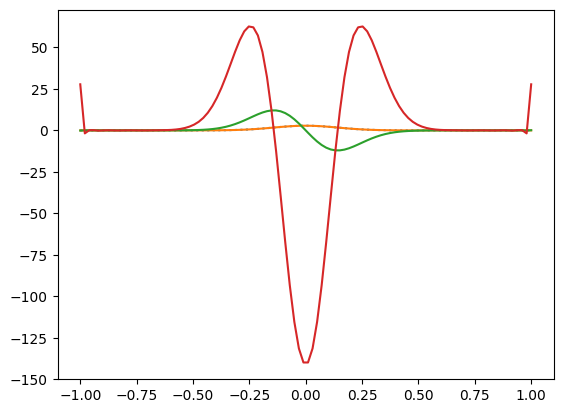

In [7]:
# Try out the Chebyshev fit and the derivatives

n = 100
x = np.linspace(-1,1,n)

T = gaussian(x, 0.0, 0.01, 1)
#T = np.ones(n)
#T[-1] = 0

a = np.polynomial.chebyshev.chebfit(x, T, 32)
print(a)

poly = np.polynomial.chebyshev.Chebyshev(a)

plt.plot(x,T,":")
plt.plot(x, poly(x))

poly1 = np.polynomial.chebyshev.Chebyshev(np.polynomial.chebyshev.chebder(a, m=1))
plt.plot(x, poly1(x))

poly2 = np.polynomial.chebyshev.Chebyshev(np.polynomial.chebyshev.chebder(a, m=2))
plt.plot(x, poly2(x))

Now we can do the time-dependent evolution

dt*n_mode^2 =  0.034109588048703086 niter = 48333
Using matplotlib backend: MacOSX
starting bcs: -5.551115123125783e-17 -5.551115123125783e-17
Final t= 0.3  tend= 0.3
Final a values =  [ 2.13941343e-01  1.73249377e-02 -2.26792749e-01 -2.03018468e-02
  1.32560668e-02  3.17948846e-03 -4.25144160e-04 -2.10367497e-04
  2.17486973e-05  7.99352180e-06 -1.32082849e-06 -2.05437733e-07
  5.47629716e-08]


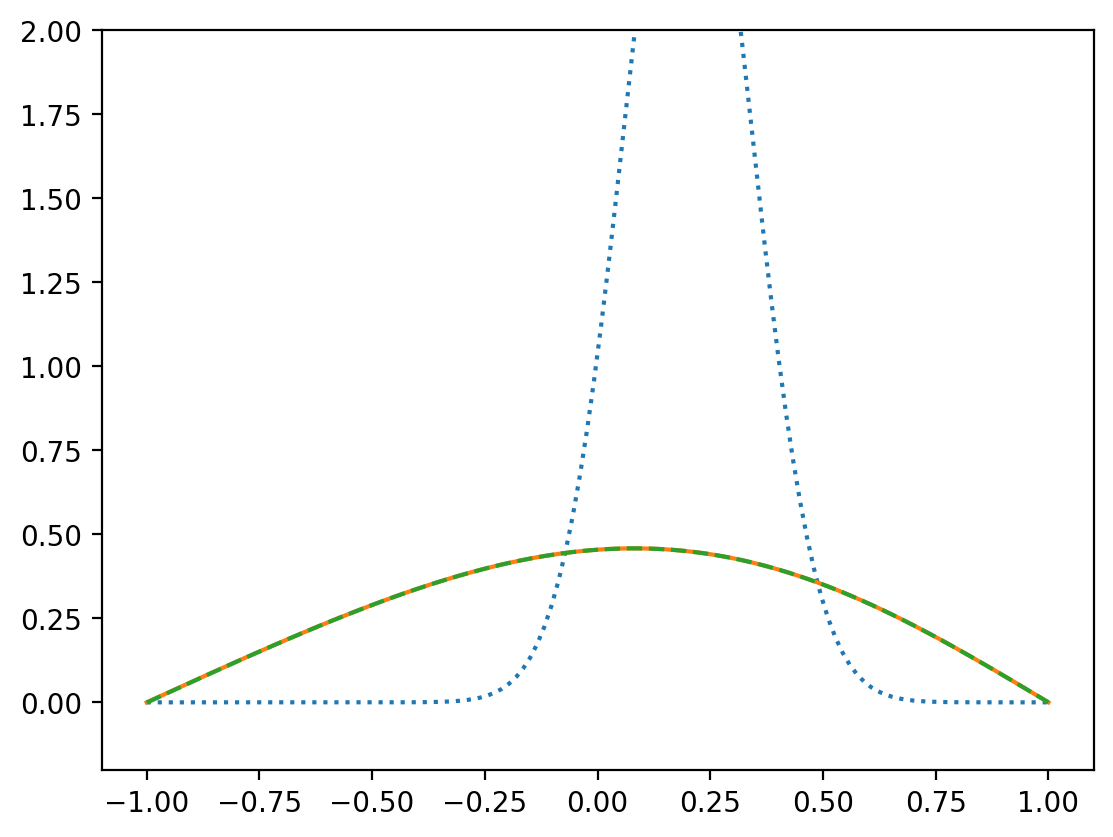

max error =  0.0007489344801900435


In [12]:
# Time evolution

def evolve(x, T, n_mode, t0, tend, dt, output = True):
    # boundary conditions
    # T=1 on the left and 0 on the right (as in HW5)
    #b1 = 0.5
    #b2 = -0.5
    # zero on each side
    b1 = 0
    b2 = 0

    # we need an even number of modes
    if n_mode%2:
        n_mode += 1
    a = np.polynomial.chebyshev.chebfit(x, T, n_mode)
    a[-1] = b1-np.sum(a[:-1:2])
    a[-2] = b2-np.sum(a[1:-2:2])

    niter = int((tend-t0)/dt)
    dt = (tend-t0)/niter

    poly = np.polynomial.chebyshev.Chebyshev(a)

    print('dt*n_mode^2 = ', dt*(2*np.pi*n_mode)**2, 'niter =', niter)

    if output:
        %matplotlib
        print('starting bcs:', poly(-1), poly(1))
        fig, ax = plt.subplots()
        plt_handle1, = plt.plot(x, T,":")
        plt_handle2, = plt.plot(x, poly(x))
        plt.ylim((-0.2,1.2))

    for i in range(niter):

        # time-update
        da = dt * np.polynomial.chebyshev.chebder(a, m=2)
        a[:-2] = a[:-2] + da

        # kill off the modes with very low amplitudes, helps to avoid roundoff causing boundary problems
        a[np.abs(a)/np.max(np.abs(a))<1e-10] = 0
        
        # set the amplitude of the last mode to enforce zero boundary condition
        a[-1] = b1-np.sum(a[:-2:2])
        a[-2] = b2-np.sum(a[1:-2:2])
    
        t = t0 + (i+1)*dt
        if output:
            if (i % int(niter/100) == 0) or i == niter-1:
                poly = np.polynomial.chebyshev.Chebyshev(a)
                #print(i, poly(-1), poly(1))
                plt_handle1.set_ydata(greens(x, x0, t, 1))
                plt_handle2.set_ydata(poly(x))
                ax.set_title('t=%lg' % (t0 + (i+1)*dt,))
                plt.draw()
                plt.pause(1e-3)
    
    if output:
        %matplotlib inline    
        print('Final t=',t,' tend=',tend)
        print('Final a values = ', a)
    
    # send back the result in real space
    poly = np.polynomial.chebyshev.Chebyshev(a)
    return poly(x)
 
    
# initial condition
n = 128
x = np.linspace(-1,1,n, endpoint=True)
dx = x[1]-x[0]
t0 = 0.01
x0 = 0.2
Tinit = greens(x, x0, t0, 1)
#T = np.ones(n)

tend = 30*t0
T = evolve(x, Tinit, 12, t0, tend, 6e-6)

plt.clf()
plt.plot(x, Tinit, ':')
plt.plot(x, T)
plt.plot(x, greens(x, x0, tend, 1),"--")
plt.ylim((-0.2,2))
plt.show()

print("max error = ", np.max(np.abs(T - greens(x, x0, tend, 1))))

Check the scaling with timestep:

n= 128
dt*n_mode^2 =  0.00047378839009129835 niter = 3333
2.0 1.5275099289619556
dt*n_mode^2 =  0.0018951535603651934 niter = 3333
4.0 1.137742350609602
dt*n_mode^2 =  0.004264095510821685 niter = 3333
6.0 0.748354697594884
dt*n_mode^2 =  0.0075806142414607735 niter = 3333
8.0 0.4152737654376424
dt*n_mode^2 =  0.011844709752282459 niter = 3333
10.0 0.20104921182692692
dt*n_mode^2 =  0.01705638204328674 niter = 3333
12.0 0.0802876975680904
dt*n_mode^2 =  0.02321563111447362 niter = 3333
14.0 0.026531326123637733
dt*n_mode^2 =  0.030322456965843094 niter = 3333
16.0 0.007461368828320714
dt*n_mode^2 =  0.03837685959739517 niter = 3333
18.0 0.002141763540977726
dt*n_mode^2 =  0.047378839009129835 niter = 3333
20.0 0.0006747037903047648
dt*n_mode^2 =  0.057328395201047086 niter = 3333
22.0 0.00022713786231176591


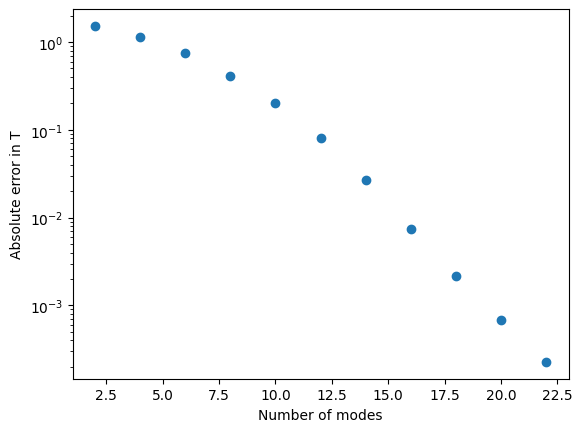

In [15]:
# initial condition
n = 128
print('n=',n)
x = np.linspace(-1,1,n, endpoint=True)
dx = x[1]-x[0]
t0 = 0.01
x0 = 0.2
Tinit = greens(x, x0, t0, 1)
tend = 2*t0

n_vals = np.linspace(2,22,11)
err_vals = np.array([])

for nmodes in n_vals:
    T = evolve(x, Tinit, int(nmodes), t0, tend, 3e-6, output=False)
    err = np.max(np.abs(T - greens(x, x0, tend, 1)))
    print(nmodes, err)
    err_vals = np.append(err_vals, err)
    
plt.plot(n_vals, err_vals, 'o')
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('Absolute error in T')
plt.xlabel('Number of modes')
plt.show()


Spectral methods usually give exponential convergence with the number of modes. The convergence is faster than the $1/N^2$ you might expect for a second order finite difference.